<a href="https://colab.research.google.com/github/KenMuriuki/Autolib-Hypothesis-test/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_07_Kennedy_Muriuki_Autolib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa Data Science project week 4

In this weeks independent project, we are working as data scientists in the Autolib electric car sharing company to investigate a claim about the blue cars from the provided Autolib dataset.

## Loading the dataset and checking through the dataset


In [4]:
# loading the required libraries
import pandas as pd
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# loading the dataset
autolib_dataset = pd.read_csv('autolib_daily_events.csv')
autolib_dataset.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [6]:
# identifying the shape of the dataset
autolib_dataset.shape

(16085, 13)

In [10]:
# looking at the info of the dataset
autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [17]:
# looking for the missing values in the dataset

autolib_dataset.isnull().values.any()

False

In [18]:
# confirming there are no missing values

autolib_dataset.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

## Conducting the necesary data cleaning procedures

In [40]:
# checking for duplicates

autolib_dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

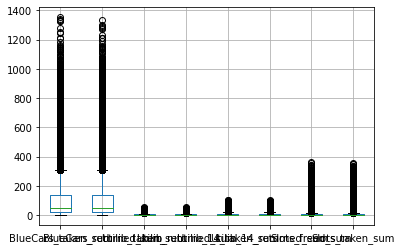

In [46]:
# checking for outliers

autolib_dataset.boxplot(['BlueCars_taken_sum','BlueCars_returned_sum','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'])

Since the data is composed of outliers, we will not remove them.

## Univariate summaries

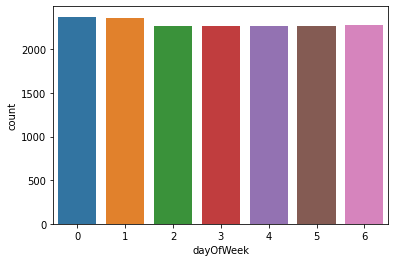

In [80]:
sns.countplot(autolib_dataset['dayOfWeek'])

weekday    11544
weekend     4541
Name: day_type, dtype: int64


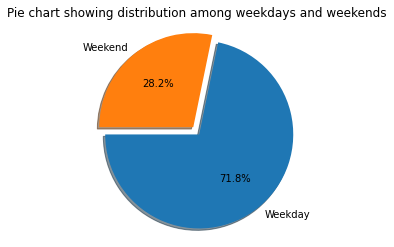

In [67]:
x = autolib_dataset['day_type'].value_counts()
print(x)

plt.pie(x, autopct='%1.1f%%', labels=['Weekday','Weekend'], explode=(0.1,0), startangle=180, shadow=True)
plt.axis('equal')
plt.title('Pie chart showing distribution among weekdays and weekends')
plt.show()

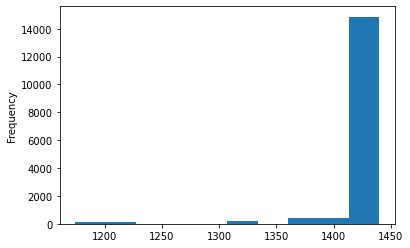

In [72]:
autolib_dataset['n_daily_data_points'].plot.hist()

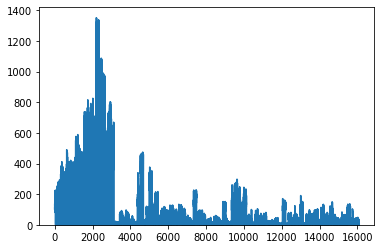

In [74]:
autolib_dataset['BlueCars_taken_sum'].plot.area()

## Bivariate summaries

In [75]:
autolib_dataset.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


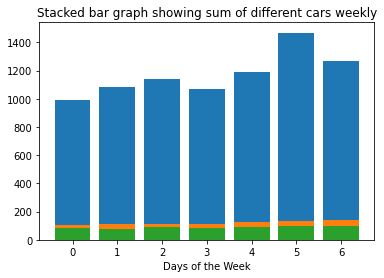

In [83]:
plt.bar(autolib_dataset['dayOfWeek'], autolib_dataset['BlueCars_taken_sum'], label= 'Blue cars sum', bottom= autolib_dataset['Utilib_taken_sum']+autolib_dataset['Utilib_14_taken_sum'])
plt.bar(autolib_dataset['dayOfWeek'], autolib_dataset['Utilib_taken_sum'], label= 'utilib cars sum', bottom= autolib_dataset['Utilib_14_taken_sum'])
plt.bar(autolib_dataset['dayOfWeek'], autolib_dataset['Utilib_14_taken_sum'], label= 'utilib14 cars sum')
plt.title('Stacked bar graph showing sum of different cars weekly')
plt.xlabel('Days of the Week')
plt.show()

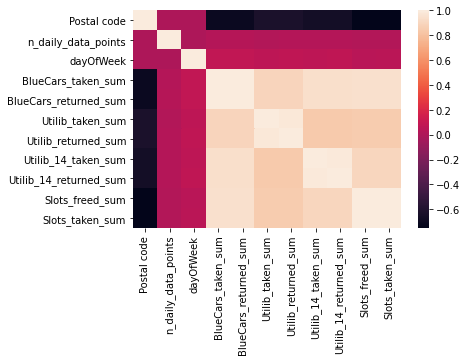

In [25]:
# correlation
sns.heatmap(autolib_dataset.corr())

## Hypothesis testing

### Problem Statement

As a data scientist, I wanted to investigate the usage of blue electric cars in the city of Paris, France. The data provided is grouped according to the 4 areas of the city of Paris (Paris, Bobigny, Créteil, Nanterre) . I specifically looked at two areas that is, Paris (denoted by postcode starting with 75) and Créteil (starting with the postcode 94). 
The Autolib company claims that the mean usage of Bluecars is no different in the Paris area. As a researcher, I decided to investigate if the claim was true in the areas of Paris and Créteil. I decided to compare the mean Bluecars taken in Paris to the mean Bluecars taken in Créteil to check if there was a difference.

Therefore the research hypothesis is as follows

Ho : µ1 − µ2 = 0 The mean usage of Bluecars in Paris is not significantly different from the mean usage of Bluecars in Créteil

Ha : µ1 − µ2 ≠ 0 The mean usage of Bluecars in Paris is significantly different from the mean usage of Bluecars in Créteil

This research is important to identify if the electric car market in the city of Paris is segmented and therefore needs to be addressed separately. As previous research indicates that several postcodes have more usage than others, it would be prudent to identify if it reflects the difference in mean usage according to the area of usage.

In [84]:
autolib_dataset.head(3)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27


In [7]:
# dropping the irrelevant columns
autolib_dataset_dropped = autolib_dataset.drop(['n_daily_data_points','Utilib_taken_sum','Utilib_returned_sum','Utilib_14_taken_sum','Utilib_14_returned_sum','Slots_freed_sum','Slots_taken_sum'], axis=1)
autolib_dataset_dropped.head()


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,0,weekday,110,103
1,75001,1/2/2018,1,weekday,98,94
2,75001,1/3/2018,2,weekday,138,139
3,75001,1/4/2018,3,weekday,104,104
4,75001,1/5/2018,4,weekday,114,117


In [8]:
# selecting data from areas Paris and Créteil

x = autolib_dataset_dropped[(autolib_dataset_dropped['Postal code'] < 76000) & (autolib_dataset_dropped['day_type'] == 'weekend')]
y =  autolib_dataset_dropped[(autolib_dataset_dropped['Postal code'] >= 94000) & (autolib_dataset_dropped['Postal code'] < 95000) & (autolib_dataset_dropped['day_type'] == 'weekend')]

print(x)
print(y)


      Postal code       date  ...  BlueCars_taken_sum BlueCars_returned_sum
5           75001   1/6/2018  ...                 187                   185
6           75001   1/7/2018  ...                 180                   180
12          75001  1/13/2018  ...                 224                   223
13          75001  1/14/2018  ...                 193                   193
19          75001  1/20/2018  ...                 217                   217
...           ...        ...  ...                 ...                   ...
3415        75116   6/3/2018  ...                   7                     8
3421        75116   6/9/2018  ...                  11                    11
3422        75116  6/10/2018  ...                  13                    14
3428        75116  6/16/2018  ...                  14                    18
3429        75116  6/17/2018  ...                  11                     9

[968 rows x 6 columns]
       Postal code       date  ...  BlueCars_taken_sum BlueCars_

In [9]:
# obtaining a random sample from x(paris data)
paris_sample = x.sample(frac=0.1)
paris_sample.head()


,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
2576,75017,3/25/2018,6,weekend,753,831
2292,75015,4/22/2018,6,weekend,925,979
1681,75011,5/5/2018,5,weekend,503,522
480,75004,1/13/2018,5,weekend,328,326
1944,75013,3/17/2018,5,weekend,681,678


In [10]:
# obtaining a random sample from y(Créteil data)
creteil_sample = y.sample(frac=0.1)
creteil_sample

,Postal code,date,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
14159,94160,4/15/2018,6,weekend,95,89
14442,94230,3/17/2018,5,weekend,45,44
14559,94300,2/3/2018,5,weekend,69,66
13663,94130,3/18/2018,6,weekend,50,44
13385,94110,4/21/2018,5,weekend,40,38
...,...,...,...,...,...,...
13793,94140,2/17/2018,5,weekend,87,83
14131,94160,3/18/2018,6,weekend,70,82
13081,94000,4/28/2018,5,weekend,141,133
13735,94130,6/9/2018,5,weekend,53,50


### Checking assumptions of normality

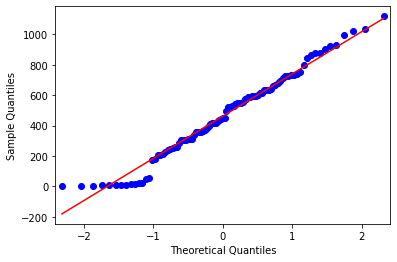

In [136]:
# testing for normality of the Paris samples 

from statsmodels.graphics.gofplots import qqplot

qqplot(paris_sample['BlueCars_taken_sum'], line='s')
plt.show()

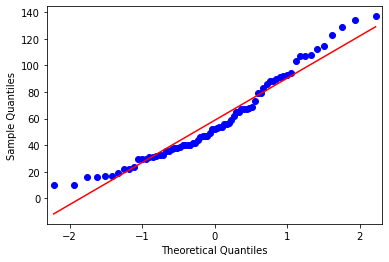

In [137]:
# testing for normality of the Créteil sample 

qqplot(creteil_sample['BlueCars_taken_sum'], line='s')
plt.show()

### Calculating the T statistic

In [11]:
# The assumption is that the probability is normally distributed and that the 
# variance in the usage of bluecars in Paris is different to the variance in the 
# usage of bluecars in Créteil. Therefore we are going to conduct a 2-sample 
# ttest of population means with unknown unequal variances

x_bar = np.mean(paris_sample['BlueCars_taken_sum'])
y_bar = np.mean(creteil_sample['BlueCars_taken_sum'])
x_std = np.std(paris_sample['BlueCars_taken_sum'])
y_std = np.std(creteil_sample['BlueCars_taken_sum'])

n1 = 97
n2 = 75

print(x_bar, y_bar, x_std, y_std)

t_stat = (x_bar - y_bar) / np.sqrt((x_std**2 / n1) + (y_std**2 / n2))
print('The Test statistic is ' + str(t_stat))

508.7938144329897 61.306666666666665 299.2859522243772 37.96664266900031
The Test statistic is 14.574945129404258


In [20]:
# calculating the t critical
df = 97 + 75 - 2
alpha = 0.05

cv = t.ppf(1 - alpha, df)
cv

1.6538663174513006

In [21]:
# calculating the p value
p = (1-t.cdf(abs(t_stat),df))*2
p

0.0

In [24]:
# determine the decision from the hypothesis test
if p <= alpha:
  print('Reject the null hypothesis. There is a significant difference.')
else:
  print('Fail to reject the null hypothesis. There is no significant difference.')

Reject the null hypothesis. There is a significant difference.


The null hypothesis has been rejected. This therefore shows that there is a significant difference between the mean usage of Bluecars in Paris and the mean usage of Bluecars in Créteil.